# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

>**Respuesta:** 
Las características más importantes para determinar el precio de la vivienda son su ubicación, tamaño (área) y número de habitaciones, estas deberían ser suficientes predictores del precio. También puede ser muy valioso saber el número de baños, y si tiene o no parking. 
Para propiedades que no sean vivienda la ubicación y el área serán lo importante.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
# Leemos la data a un data frame usando la libreria pandas
listings_data = pd.read_csv("Datos_Properati.csv")

# Miramos las dimensiones de la data y las primeras entradas
print(listings_data.shape)
listings_data.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
# miramos cuantos datos faltantes hay en cada columna
print(listings_data.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [5]:
#Renombramos las columnas que lo necesitan
listings_data.rename(columns = {'l1':'country', 'l2':'area','l3':'neighborhood'}, inplace = True)

# Miramos los valores unicos de las columnas categóricas para saber como podríamos analizar los datos
cat_col_names = ['country','area','neighborhood','currency','property_type','operation_type']
for item in cat_col_names:
    row = [item, str(pd.unique(listings_data[item]))]
    print(row)

['country', "['Argentina']"]
['area', "['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'\n 'Bs.As. G.B.A. Zona Oeste']"]
['neighborhood', "['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'\n 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'\n 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'\n 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'\n 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'\n 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'\n 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'\n 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'\n 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'\n 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'\n 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'\n 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'\n 'Esteban Echeverría

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
# Usamos funciones propias de pandas para saber cuantos tipos de propiedad tenemos, y cuantos listings hay en cada uno

print('Hay ' + str(listings_data['property_type'].nunique()) + ' tipos de propiedad:',)
listing_types = listings_data['property_type'].value_counts()
print (listing_types)

Hay 10 tipos de propiedad:
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0, 0.5, 'Number of Listings')

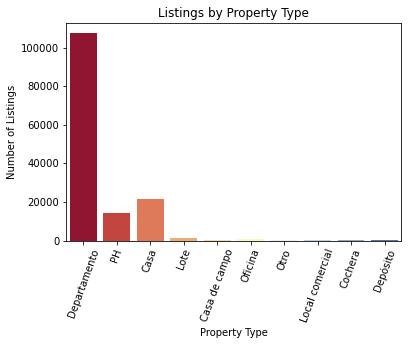

In [7]:
# Vemos que la mayoría de aptos son departamentos y casas, graficamos esto:
listings_types = pd.DataFrame(listings_data['property_type'].value_counts())
listings_types_plot = sns.countplot(x = 'property_type', data = listings_data, palette=["#a50026","#d73027","#f46d43","#fdae61","#fee090","#ffffbf","#e0f3f8","#abd9e9","#74add1","#4575b4","#313695"],)
listings_types_plot.set_xticks(range(len(listings_data.property_type.unique())), minor = False)
listings_types_plot.set_xticklabels(labels = list(listings_data.property_type.unique()), rotation=70) 
listings_types_plot.set_title('Listings by Property Type')
listings_types_plot.set_xlabel('Property Type')
listings_types_plot.set_ylabel('Number of Listings')

Text(0, 0.5, 'Number of Listings')

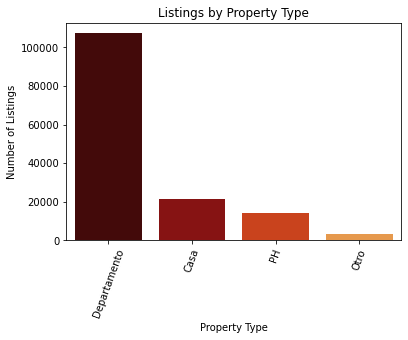

In [8]:
# Después de casa, los otros tipos de propiedad no son muy comunes en el data set, graficamos esto
ltval = listings_types.loc[listings_types.index.isin(['Departamento','PH','Casa','Otro'])]
ltotros = listings_types.loc[listings_types.index.isin(['Lote','Casa de campo','Oficina','Local comercial','Cochera','Depósito','Otro'])]
ltval.property_type['Otro'] = sum(ltotros.property_type) 

lt_plot2 = sns.barplot(x = ltval.index, y = ltval.property_type, data = ltval, palette='gist_heat',)
lt_plot2.set_xticks(range(len(ltval.index.unique())), minor = False)
lt_plot2.set_xticklabels(labels = list(ltval.index.unique()), rotation=70)
lt_plot2.set_title('Listings by Property Type')
lt_plot2.set_xlabel('Property Type')
lt_plot2.set_ylabel('Number of Listings')

> Es evidente que la gran mayoría de publicaciones en nuestra página se hacen para la venta de residencias (predominantemente apartamentos), las cantidades de listings de otros tipos de propiedades como casas de campo y espacios comerciales no son significativas 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(0, 0.5, 'Number of Listings')

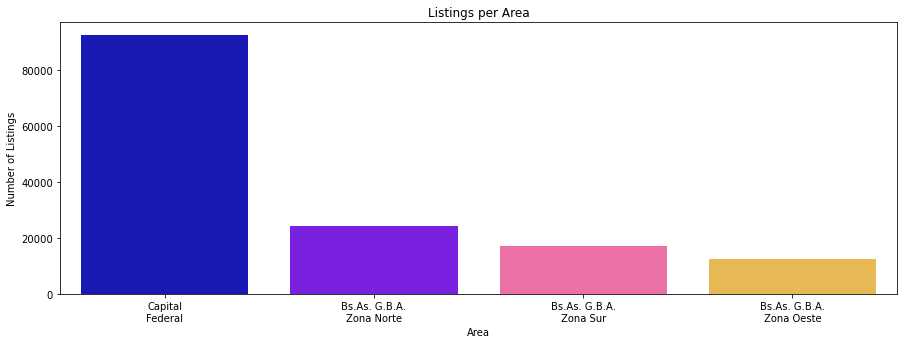

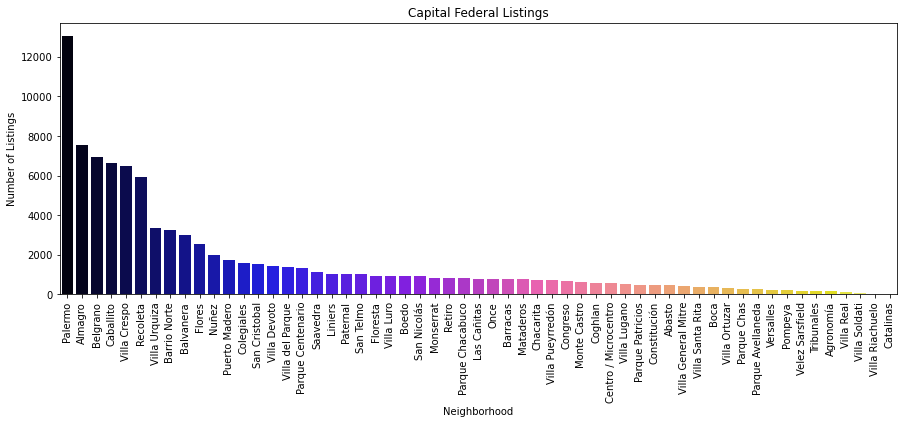

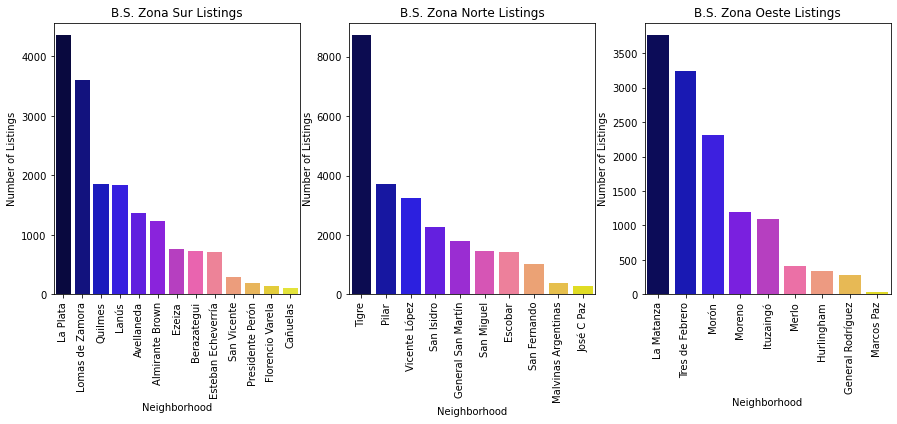

In [8]:
l2_counts = pd.DataFrame(listings_data.area.value_counts())

l3_counts_cf = listings_data.loc[listings_data['area'] == 'Capital Federal']
l3_counts_cf= pd.DataFrame(l3_counts_cf.neighborhood.value_counts())

l3_counts_zs = listings_data.loc[listings_data['area'] == 'Bs.As. G.B.A. Zona Sur']
l3_counts_zs= pd.DataFrame(l3_counts_zs.neighborhood.value_counts())

l3_counts_zn = listings_data.loc[listings_data['area'] == 'Bs.As. G.B.A. Zona Norte']
l3_counts_zn = pd.DataFrame(l3_counts_zn.neighborhood.value_counts())

l3_counts_zo = listings_data.loc[listings_data['area'] == 'Bs.As. G.B.A. Zona Oeste']
l3_counts_zo = pd.DataFrame(l3_counts_zo.neighborhood.value_counts())

f = plt.figure(1)
f.set_figheight(5)
f.set_figwidth(15)
l2_plot = sns.barplot(x = l2_counts.index, y = l2_counts.area, data = l2_counts, palette = 'gnuplot2')
l2_plot.set_xticks(range(len(l2_counts.index.unique())), minor = False)
l2_plot.set_xticklabels(labels = ['Capital\nFederal', 'Bs.As. G.B.A.\nZona Norte', 'Bs.As. G.B.A.\nZona Sur','Bs.As. G.B.A.\nZona Oeste'])
l2_plot.set_title('Listings per Area')
l2_plot.set_xlabel('Area')
l2_plot.set_ylabel('Number of Listings')

g = plt.figure(2)
g.set_figheight(5)
g.set_figwidth(15)
cf_plot = sns.barplot(x = l3_counts_cf.index, y = l3_counts_cf.neighborhood, data = l3_counts_cf, palette = 'gnuplot2')
cf_plot.set_xticks(range(len(l3_counts_cf.index.unique())), minor = False)
cf_plot.set_xticklabels(labels = list(l3_counts_cf.index.unique()), rotation=90)
cf_plot.set_title('Capital Federal Listings')
cf_plot.set_xlabel('Neighborhood')
cf_plot.set_ylabel('Number of Listings')

zonas = plt.figure(3)
zonas.set_figheight(5)
zonas.set_figwidth(15)

plt.subplot(131)
zs_plot = sns.barplot(x = l3_counts_zs.index, y = l3_counts_zs.neighborhood, data = l3_counts_zs, palette = 'gnuplot2')
zs_plot.set_xticks(range(len(l3_counts_zs.index.unique())), minor = False)
zs_plot.set_xticklabels(labels = list(l3_counts_zs.index.unique()), rotation=90)
zs_plot.set_title('B.S. Zona Sur Listings')
zs_plot.set_xlabel('Neighborhood')
zs_plot.set_ylabel('Number of Listings')

plt.subplot(132)
zn_plot = sns.barplot(x = l3_counts_zn.index, y = l3_counts_zn.neighborhood, data = l3_counts_zn, palette = 'gnuplot2')
zn_plot.set_xticks(range(len(l3_counts_zn.index.unique())), minor = False)
zn_plot.set_xticklabels(labels = list(l3_counts_zn.index.unique()), rotation=90)
zn_plot.set_title('B.S. Zona Norte Listings')
zn_plot.set_xlabel('Neighborhood')
zn_plot.set_ylabel('Number of Listings')

plt.subplot(133)
zo_plot = sns.barplot(x = l3_counts_zo.index, y = l3_counts_zo.neighborhood, data = l3_counts_zo, palette = 'gnuplot2')
zo_plot.set_xticks(range(len(l3_counts_zo.index.unique())), minor = False)
zo_plot.set_xticklabels(labels = list(l3_counts_zo.index.unique()), rotation=90)
zo_plot.set_title('B.S. Zona Oeste Listings')
zo_plot.set_xlabel('Neighborhood')
zo_plot.set_ylabel('Number of Listings')

> La gran mayoría de las publicaciones son de la Capital Federal, como era de esperarse, y dentro de la ciudad el Barrio Palermo domina. Aún así, tenemos numeros mayores a 10000 publicaciones en las otras zonas lo que permitiría hacer un estudio adecuado de ellas aunque no sean mayoría en el dataset.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [9]:
# Filtramos por las condiciones dadas
main_listings = listings_data.loc[(listings_data.property_type.isin(['Departamento','PH','Casa'])) & (listings_data.area == 'Capital Federal')]
main_listings.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [10]:
# Iniciamos filtrando los valores donde la superficie cubierta es mayor que la total
main_listings = main_listings[main_listings.surface_covered <= main_listings.surface_total]
main_listings.shape

(81291, 19)

In [11]:
# Miramos la distribución estadistica de las variable seleccionadas
variables = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
for variable in variables:
    print(variable,'\n',main_listings[variable].describe(),'\n')

rooms 
 count    81291.000000
mean         3.004957
std          1.299796
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64 

bedrooms 
 count    81291.000000
mean         1.998745
std          1.045831
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64 

bathrooms 
 count    80458.000000
mean         1.554600
std          0.853083
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64 

surface_total 
 count     81291.000000
mean        112.920348
std         988.263003
min          12.000000
25%          49.500000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64 

surface_covered 
 count     81291.000000
mean         92.261271
std         769.777375
min           1.000

In [12]:
# los máximos estan muy alejados de los Q3, podría ser un mismo outlier.
main_listings[main_listings.rooms == 26]
# es el outlier max en las variables rooms y bedrooms, pero no en las otras (index = 31585 y 111651)

,start_date,end_date,created_on,lat,lon,country,area,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
31583,2020-01-06,2020-01-25,2020-01-06,-34.63749,-58.362723,Argentina,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,USD,CASA CON LOTE LA BOCA VENTA OPORTUNIDAD,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta
111651,2020-01-24,2020-02-05,2020-01-24,-34.63749,-58.362723,Argentina,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,USD,CASA CON LOTE LA BOCA VENTA OPORTUNIDAD,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta


In [13]:
#visualizamos los otros outliers
main_listings[main_listings.bathrooms == 14]
# debe ser una pulicación mal hecha, 3 instancias donde aparecen 14 baños pero solo 2 cuartos y solo 1 habitación
# index = 35960, 132709, 136930

,start_date,end_date,created_on,lat,lon,country,area,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
35960,2019-01-11,2019-02-04,2019-01-11,-34.576782,-58.423782,Argentina,Capital Federal,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,USD,JUNCAL 4600.PALERMO NUEVO.VENTA 2 AMBIENTES CO...,EXCELENTE SEMIPISO 2 AMBIENTES EN PALERMO NUEV...,Departamento,Venta
132709,2019-02-13,2019-06-23,2019-02-13,NaN,NaN,Argentina,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento,Venta
136930,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento,Venta


In [14]:
main_listings[main_listings.surface_total == 126062]
#Podria no tener errores en este caso index = 13243, 35231, 90235

,start_date,end_date,created_on,lat,lon,country,area,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
13243,2019-08-05,2019-10-08,2019-08-05,-34.606165,-58.455126,Argentina,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,220000.0,USD,PH 5 AMBIENTES CON PATIO Y PARRILLA CABALLITO,Corredor Responsable: Monica Alejandra Mazza -...,PH,Venta
35231,2019-04-18,2019-05-02,2019-04-18,-34.606165,-58.455126,Argentina,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126.0,240000.0,USD,PH 5 AMBIENTES CON PATIO Y PARRILLA,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta
90235,2019-03-10,2019-07-15,2019-03-10,-34.606165,-58.455126,Argentina,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,215000.0,USD,PH 5 AMBIENTES CON PATIO Y PARRILLA CABALLITO,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta


In [15]:
main_listings[main_listings.surface_covered == 126062]
#Podria no tener errores en este caso index = 13243, 90235, 35231 tambien pero hay un typo en surface_covered

,start_date,end_date,created_on,lat,lon,country,area,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
13243,2019-08-05,2019-10-08,2019-08-05,-34.606165,-58.455126,Argentina,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,220000.0,USD,PH 5 AMBIENTES CON PATIO Y PARRILLA CABALLITO,Corredor Responsable: Monica Alejandra Mazza -...,PH,Venta
90235,2019-03-10,2019-07-15,2019-03-10,-34.606165,-58.455126,Argentina,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,215000.0,USD,PH 5 AMBIENTES CON PATIO Y PARRILLA CABALLITO,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta


In [16]:
main_listings[main_listings.price == max(main_listings.price)]
# No tiene sentido tampoco, poca superficie para ese precio index = 76894

,start_date,end_date,created_on,lat,lon,country,area,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
76894,2019-10-25,2019-11-06,2019-10-25,-34.593956,-58.415855,Argentina,Capital Federal,Palermo,1.0,1.0,4.0,43.0,43.0,32434232.0,USD,Venta Departamento en Palermo Capital Federal ...,"Departamento en Venta, PRUEBA PRUEBA, con una...",Departamento,Venta


Text(0.5, 1.0, 'Price ($USD)')

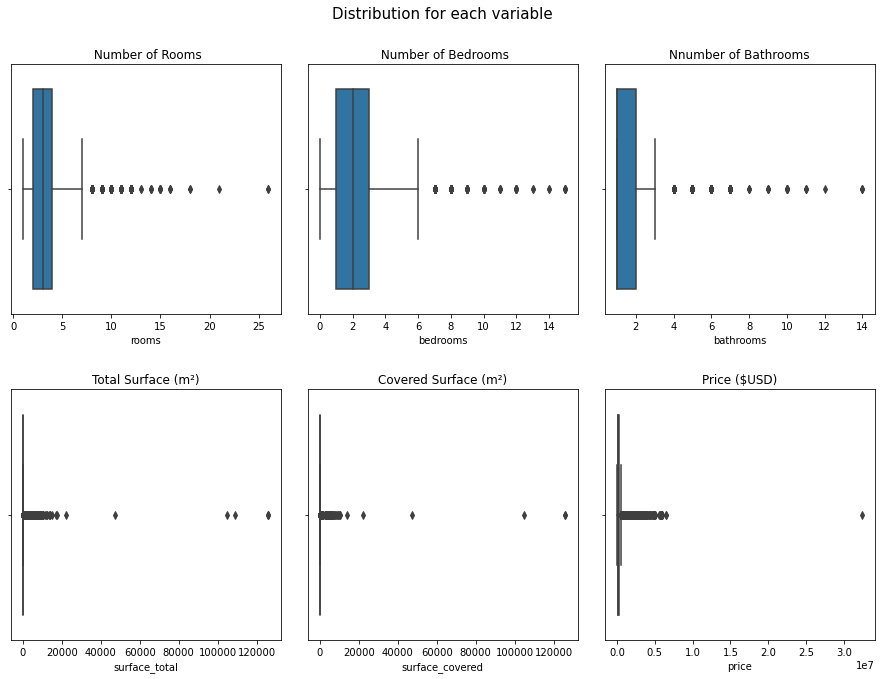

In [17]:
boxplots = plt.figure(1)
boxplots.set_figheight(10)
boxplots.set_figwidth(15)
boxplots.suptitle('Distribution for each variable', fontsize = 15)
boxplots.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.3)

plt.subplot(231)
sns.boxplot(x = main_listings.rooms)
plt.title(' Number of Rooms')

plt.subplot(232)
sns.boxplot(x = main_listings.bedrooms)
plt.title(' Number of Bedrooms')

plt.subplot(233)
sns.boxplot(x = main_listings.bathrooms)
plt.title('Nnumber of Bathrooms')

plt.subplot(234)
sns.boxplot(x = main_listings.surface_total)
plt.title('Total Surface (m²)')

plt.subplot(235)
sns.boxplot(x = main_listings.surface_covered)
plt.title('Covered Surface (m²)')

plt.subplot(236)
sns.boxplot(x = main_listings.price)
plt.title('Price ($USD)')

> Para las variables de habitaciones y baños podemos ver que la mayoría de datos están en rangos bajos. Los que podemos considerar outliers aún asi no levantan mucha sospecha ya que no se salen del orden de magnitud esperado para una mansión gigante por ejemplo. 

> Las distribuciones de las superficies y el precio si son imposibles de apreciar si se quiere ver el rango entero de datos en el mismo boxplot, entonces graficamos hasta donde parece haber alta concentración de outliers todavía.

In [18]:
# Podemos ver que además de los outliers ya identificados, en surface_total y surface _covered habrian otros 3 que no permiten visualizar la gráfica
# En precio solo hay un outlier alejado del resto

#Usamos los index identificados antes para eliminar estos outliers
main_listings.drop(index = [76894, 13243, 90235, 35231, 35960, 132709, 136930, 31583, 111651], inplace = True)

Text(0.5, 1.0, 'Price ($USD)')

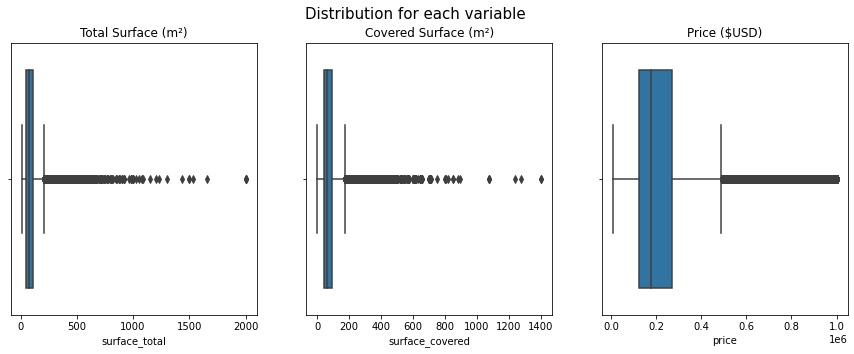

In [19]:
# Graficamos sin los outliers y limitando las superficies a 2000 por lo que vemos en los boxplots, y el precio a 1 millon de USD

boxplots = plt.figure(1)
boxplots.set_figheight(5)
boxplots.set_figwidth(15)
boxplots.suptitle('Distribution for each variable', fontsize = 15)

plt.subplot(131)
sns.boxplot(x = main_listings.surface_total[main_listings.surface_total <= 2000])
plt.title('Total Surface (m²)')

plt.subplot(132)
sns.boxplot(x = main_listings.surface_covered[main_listings.surface_covered <= 2000])
plt.title('Covered Surface (m²)')

plt.subplot(133)
sns.boxplot(x = main_listings.price[main_listings.price <= 1000000])
plt.title('Price ($USD)')

Text(0.5, 1.0, 'Price ($USD)')

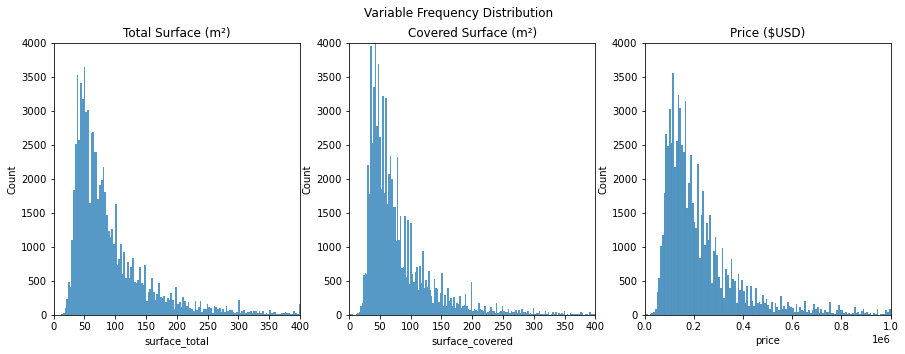

In [20]:
# Continua siendo dificil de visualizar, pero podemos hacernos una idea de las superficies y
# precios mas comunes, realizamos histogramas acotados  estos rangos

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Variable Frequency Distribution')

st = sns.histplot(main_listings.surface_total, ax = ax1)
st.set(ylim = (0, 4000))
st.set(xlim = (0, 400))
st.set_title('Total Surface (m²)')

sc = sns.histplot(main_listings.surface_covered, ax = ax2)
sc.set(ylim = (0, 4000))
sc.set(xlim = (0, 400))
sc.set_title('Covered Surface (m²)')

p = sns.histplot(main_listings.price, ax = ax3)
p.set(ylim = (0, 4000))
p.set(xlim = (0, 1000000))
p.set_title('Price ($USD)')

> Podemos ver que la mayoría de propiedades en venta en nuestra página tienen un rango de superficie menor a 200 m², pero aún asi hay muchas propiedades con mucha superficie tanto cubierta como descubierta. Lo que podría ser congruente con las propiedades que dicen tener hasta 26 espacios.

> Estas propiedades de 200 m² o menos deben correpsonder también a la mayoría de precios que vemos son menos de \$500000 USD. Pero sabemos que también manejamos propiedades alrededor del millon de dólares, y allgunas que incluso cruzan la barrera de los 10 millones.

Text(0.5, 1.01, 'Pairplot for selected variables')

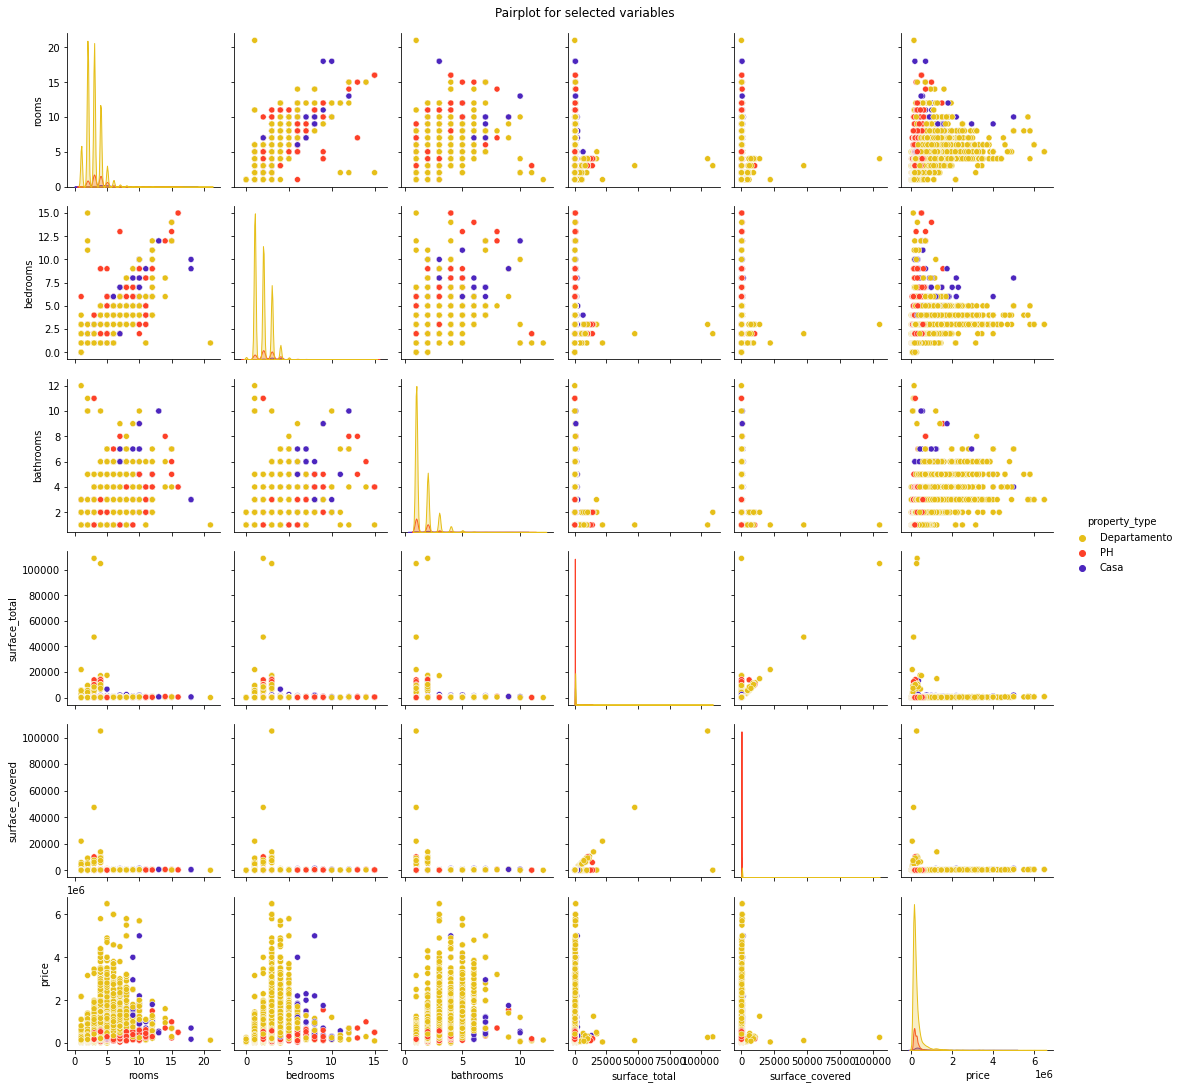

In [149]:
# Finalmente graficamos un pairplot para mirar rápidamente las relaciones entre las variables
sns.pairplot(data = main_listings[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']], palette = 'CMRmap_r', hue = 'property_type')
plt.suptitle('Pairplot for selected variables', y = 1.01)

> En la diagonal de este pairplot podemos ver como todas las variables estan altamente concentradas en los valores mas bajos de su rango, esto podría significar menos datos para entrenar cualquie modelo en los rangos de precios más altos y por ende menos confianza en los resultados para ese tipo de propiedades.

> Las relación más cercana que podemos observar graficamente están entre el numero de baños y el numero de espacios, y entre la superficie cubierta y la total, ambos pares parecen ser linealmente proporcionales, que era de esperarse. Ya que graficamente no podemos concluir, dependeremos mucho de la correlacion numerica con el precio que es nuestra variable objetivo. 

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1.0, 'Houses')

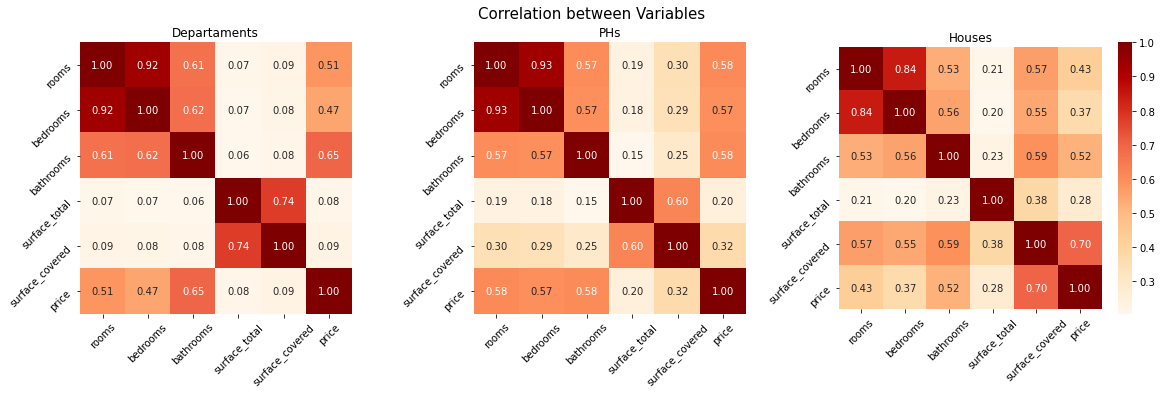

In [150]:
apto = main_listings.loc[main_listings.property_type == 'Departamento']
apto = apto[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

PH = main_listings.loc[main_listings.property_type == 'PH']
PH = PH[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

casa = main_listings.loc[main_listings.property_type == 'Casa']
casa = casa[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

corrs = plt.figure(1)
corrs.set_figheight(5)
corrs.set_figwidth(20)
corrs.suptitle('Correlation between Variables', fontsize = 15)

plt.subplot(131)
sns.heatmap(apto.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',
           xticklabels= apto.columns, 
           yticklabels= apto.columns,
           cmap= 'OrRd')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Departaments')

plt.subplot(132)
sns.heatmap(PH.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',
           xticklabels= apto.columns, 
           yticklabels= apto.columns,
           cmap= 'OrRd')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('PHs')

plt.subplot(133)
sns.heatmap(casa.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           xticklabels= apto.columns, 
           yticklabels= apto.columns,
           cmap= 'OrRd')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Houses')

> Para Departamentos y PHs las variables que mejor servirán para predecir el precio son el número de cuartos, espacios y baños ya que tienen los valores de correlación más altos, siendo baños la mejor puntuada con 0.65 y 0.58 respectivamente. Para casas este ranking cambbia, la mejor correlación la encontramos con la superficie cubierta con 0.70, mayor que incluso la mejor de los baños en los otros dos tipos de propiedad. 

> Es curioso que la cantidad de espacios y habitaciones no parezcan influir mucho en el precio de las casas, incluso menos que la cantidad de baños; pero en cambio tenga tanto peso la superficie cubierta y no la total, cuando en departamentos y PH ninguna de las dos lo tiene. Tal vez en estos dos tipos de propiedad los tamaños son uniformes y lo que realmente influye en el precio es lo que han hecho los arquitectos y diseñadores con el espacio.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


> Asumiendo que las fechas de inicio y final que tenemos en el data set son las fechas en las que se pone en venta el inmueble y en las que se vende podriamos responder **¿Cuánto se demora un inmueble en venderse?, ¿Qué características hacen que se venda más rápido?**. Miraremos si es posible concluir algo con este dataset a continuación:

In [21]:
# Corroboro que el dataset a utilizar continue teniendo las  19 columnas iniciales
main_listings.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'country', 'area',
       'neighborhood', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type'],
      dtype='object')

In [22]:
# Comparamos las columnas start_date y created_on y vemos que son iguales. Si lo son, una de ellas es redundante 
if sum(main_listings.start_date != main_listings.created_on) == 0: print('Son Iguales! :)')

Son Iguales! :)


In [23]:
# Ademas, tenemos un solo país, una sola area, una sola moneda y un solo tipo de operación
# Y no utilizaremos en este caso el titulo del post, ni la descripcion o ubicación exacta provistas
# podemos borrar estas columnas.
sell_dates = main_listings.drop(columns = ['created_on', 'country', 'area', 'currency','operation_type', 'title', 'description','lat','lon'])

In [24]:
# Echamos un vistazo a los datos
sell_dates.head()

,start_date,end_date,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,2019-11-01,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [25]:
# Necesitaremos las columnas start_date y end_date en formato de fecha
from datetime import date

In [26]:
# Filtramos publicaciones creadas y borradas el mismo día
sell_dates = sell_dates.loc[sell_dates.start_date != sell_dates.end_date]

In [27]:
# Creamos la nueva columna con el tiempo de venta
sell_dates['sale_time'] = sell_dates.apply(lambda x: str(date.fromisoformat(x.end_date) - date.fromisoformat(x.start_date)), axis = 1)

In [28]:
# Miramos la distribución de esta variable
sell_dates.sale_time.describe()

count                80645
unique                 704
top       15 days, 0:00:00
freq                  5619
Name: sale_time, dtype: object

In [29]:
# Quiero solo el número de días, para convertir la variable a numérica
sell_dates.sale_time = sell_dates.sale_time.str.replace(' days, 0:00:00', '')
sell_dates.sale_time = sell_dates.sale_time.str.replace(' day, 0:00:00', '')

sell_dates.sale_time = sell_dates.sale_time.astype(int)

In [30]:
sell_dates.sale_time.describe()

count    8.064500e+04
mean     1.606251e+05
std      6.650237e+05
min      1.000000e+00
25%      1.300000e+01
50%      2.200000e+01
75%      7.800000e+01
max      2.914998e+06
Name: sale_time, dtype: float64

(array([2914550., 2914600., 2914650., 2914700., 2914750., 2914800.,
        2914850., 2914900., 2914950., 2915000., 2915050.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

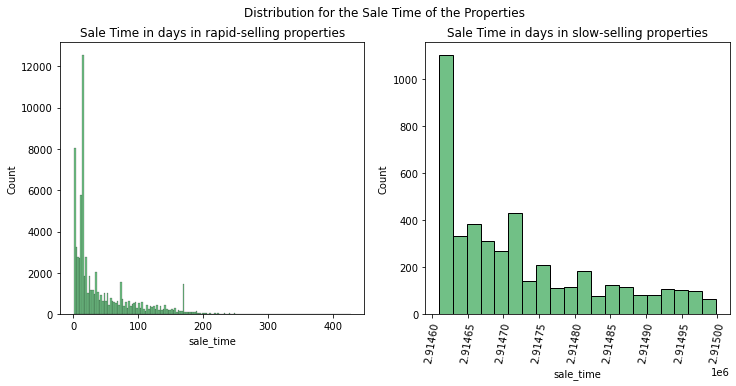

In [31]:
# Visualizando todos los valores de la columna Podemos ver que la mayoria de los inmuebles se venden en los primeros 8 días, 
# pero tambien hay bastantes que duran 2000000 o mas días en venta. Graficamos.

distribution = plt.figure(1)
distribution.set_figheight(5)
distribution.set_figwidth(12)
distribution.suptitle('Distribution for the Sale Time of the Properties')

plt.subplot(121)
p = sns.histplot(sell_dates.sale_time[sell_dates.sale_time <= 1000], color = '#41ab5d')
p.set_title('Sale Time in days in rapid-selling properties')


plt.subplot(122)
p = sns.histplot(sell_dates.sale_time[sell_dates.sale_time >= 1000], color = '#41ab5d')
p.set_title('Sale Time in days in slow-selling properties')
plt.xticks(rotation = 80)

Text(0.5, 0.98, 'Slow-Selling Properties')

<Figure size 432x1800 with 0 Axes>

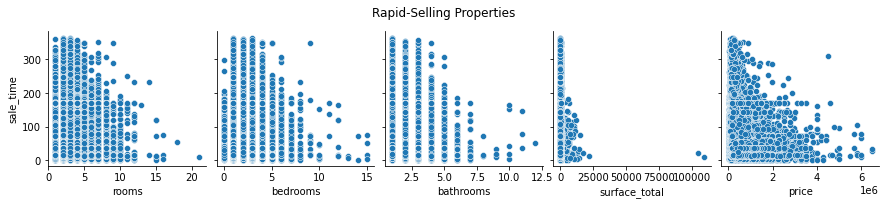

<Figure size 432x1800 with 0 Axes>

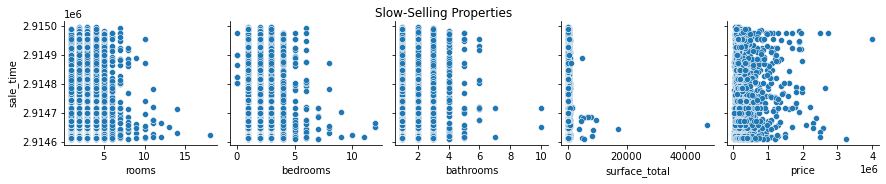

In [35]:
# Los tiempos de venta estan en dos grupos claramente separados, menos de 1 año, y mas de 7 años. Miramos la correlacion de las variables en estos dos grupos

rapid_sell = sell_dates.loc[sell_dates.sale_time <= 365]
rapid_sell = rapid_sell[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'price','neighborhood','sale_time']]

slow_sell = sell_dates.loc[sell_dates.sale_time >= 2000000]
slow_sell = slow_sell[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'price','neighborhood','sale_time']]

pairplot = plt.figure(figsize = (6, 25))
pp = sns.pairplot(data = rapid_sell, y_vars =['sale_time'], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'price'])
plt.suptitle('Rapid-Selling Properties', y = 1.1)

pairplot = plt.figure(figsize = (6, 25))
sns.pairplot(data = slow_sell, y_vars =['sale_time'], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'price'])
plt.suptitle('Slow-Selling Properties')

In [163]:
# Revisamos también el tiempo de venta promedio por cada barrio
rapid_byneigh = pd.DataFrame(rapid_sell.groupby(['neighborhood']).sale_time.mean()).sort_values(by = ['sale_time'],ascending = False)
slow_byneigh = pd.DataFrame(slow_sell.groupby(['neighborhood']).sale_time.mean()).sort_values(by = ['sale_time'],ascending = False)

Text(0.5, 1.0, 'Slow-selling Properties')

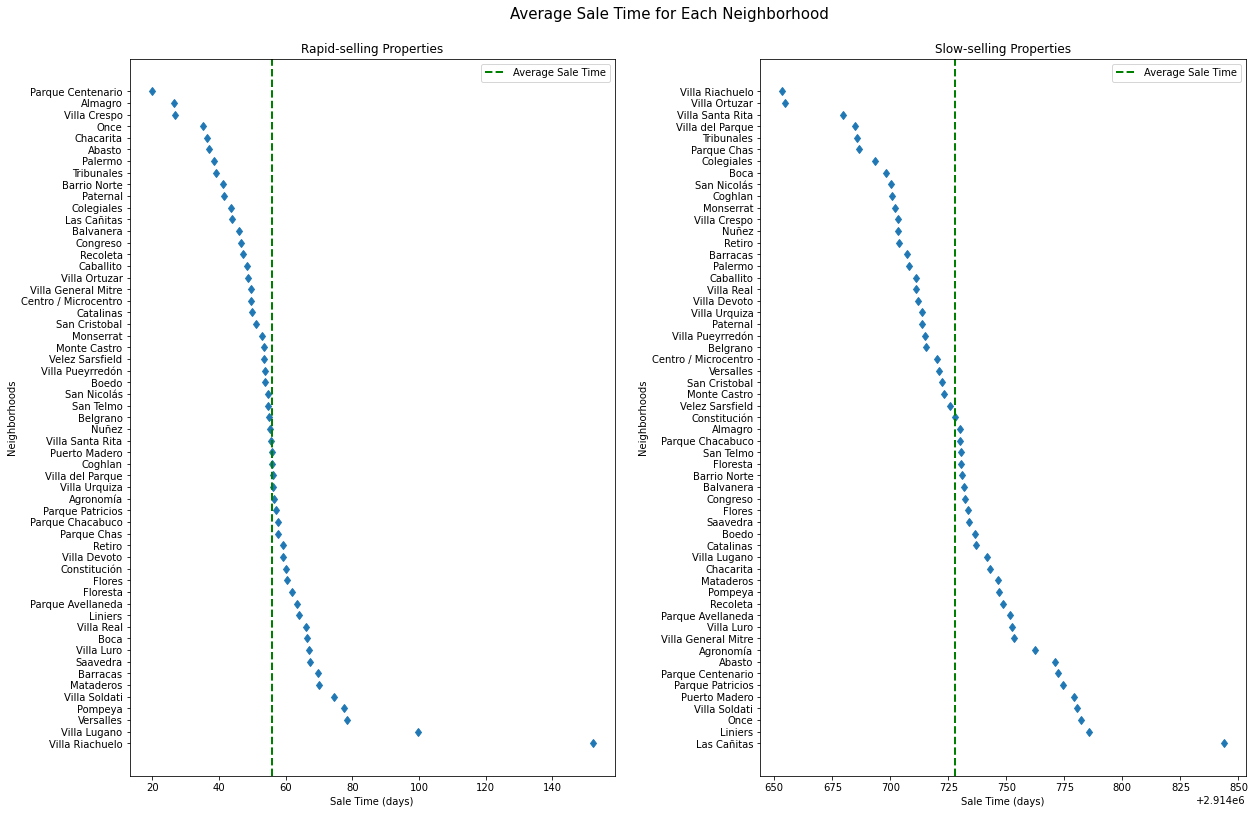

In [164]:
sales = plt.figure(1)
sales.set_figheight(12)
sales.set_figwidth(20)
sales.subplots_adjust(wspace=0.3, bottom = 0.09, top = 0.92)
sales.suptitle('Average Sale Time for Each Neighborhood', fontsize = 15)

plt.subplot(121)
plt.plot(rapid_byneigh.sale_time, rapid_byneigh.index, 'd')
plt.axvline(x = 55.760909, color = 'g', linestyle = 'dashed', linewidth = 2, label='Average Sale Time')
plt.legend()
plt.ylabel('Neighborhoods')
plt.xlabel('Sale Time (days)')
plt.title('Rapid-selling Properties')

plt.subplot(122)
plt.plot(slow_byneigh.sale_time, slow_byneigh.index, 'd')
plt.axvline(x = 2914728, color = 'g', linestyle = 'dashed', linewidth = 2, label='Average Sale Time')
plt.legend()
plt.ylabel('Neighborhoods')
plt.xlabel('Sale Time (days)')
plt.title('Slow-selling Properties')

In [165]:
quick = []
slow = []

for neighborhood in rapid_byneigh.index:
    if ((rapid_byneigh.sale_time[neighborhood] - 55.760909 < 0) and (slow_byneigh.sale_time[neighborhood] - 2914728 < 0)):
        quick.append(neighborhood)
    if ((rapid_byneigh.sale_time[neighborhood] - 55.760909 > 0) and (slow_byneigh.sale_time[neighborhood] - 2914728 > 0)):
        slow.append(neighborhood)
    else:
        continue      

In [166]:
print('Los barrios donde se vende mas rápido que el promedio sin importar el precio son: ', quick, '\n')
print('Los barrios donde se vende mas lento que el promedio sin importar el precio son: ', slow)

Los barrios donde se vende mas rápido que el promedio sin importar el precio son:  ['Villa Santa Rita', 'Nuñez', 'Belgrano', 'San Nicolás', 'Villa Pueyrredón', 'Velez Sarsfield', 'Monte Castro', 'Monserrat', 'San Cristobal', 'Centro / Microcentro', 'Villa Ortuzar', 'Caballito', 'Colegiales', 'Paternal', 'Tribunales', 'Palermo', 'Villa Crespo'] 

Los barrios donde se vende mas lento que el promedio sin importar el precio son:  ['Villa Lugano', 'Pompeya', 'Villa Soldati', 'Mataderos', 'Saavedra', 'Villa Luro', 'Liniers', 'Parque Avellaneda', 'Floresta', 'Flores', 'Parque Chacabuco', 'Parque Patricios', 'Agronomía', 'Puerto Madero']


> Parece no haber una relación marcada entre cuanto se demora la propiedad en ser vendida y caracteristicas medibles como su tamaño, y numero de espacios y baños, podría ser simplemente cuestión de que tan bueno sea tu agente inmobiliario. Pero se podría afirmar que el barrio donde está ubicada la propiedad si afecta si se vende más o menos rapido que el promedio.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [167]:
# Leemos la data a un data frame usando la libreria pandas
listings_data = pd.read_csv("Datos_Properati.csv")

# Filtramos por las condiciones dadas
C1 = listings_data.l2 == 'Capital Federal'
C2 = listings_data.property_type.isin(['Departamento','PH','Casa'])
C3 = (listings_data.surface_total <= 1000) & (listings_data.surface_total >= 15)
C4 = listings_data.price <= 4000000

listings_data = listings_data.loc[C1 & C2 & C3 & C4]
listings_data = listings_data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
listings_data.dropna(axis = 0, inplace = True)

# Miramos las dimensiones de la data
print(listings_data.shape)

(81019, 6)


In [168]:
# Nos aseguramos de que ningúna propiedad tenga superficie cubierta mayor que la total
listings_data = listings_data[listings_data.surface_covered <= listings_data.surface_total]
print(listings_data.shape)

(80276, 6)


Text(0.5, 1.0, 'Correlation between Variables for Final Data')

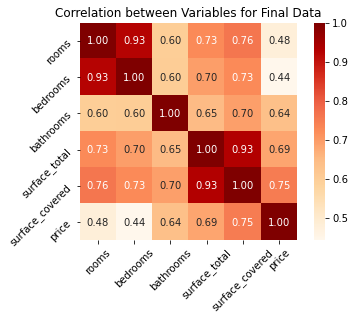

In [169]:
# Miramos como se correlacionan las variables en este data set

sns.heatmap(listings_data.corr(),
            cbar = True, 
            square = True,
            annot =True,
            fmt = '.2f',
            xticklabels = listings_data.columns,
            yticklabels = listings_data.columns,
            cmap= 'OrRd')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlation between Variables for Final Data')

In [170]:
# Con correlaciones de 0.69, 0.75 y 0.64 los siguientes son los mejores features predictores del precio
# Para este dataset

features = ['surface_total', 'surface_covered', 'bathrooms']

# Genero X, los datos a usar y y, el valor a predecir
X = listings_data[features]
y = listings_data['price']

> Construiremos una Regresión para el precio de las propiedades según la superficie total, la superficie cubierta y el número de baños

> La métrica de error que utilizaremos es el Error Promedio Absoluto (Mean Absolute Error - MAE) ya que nos permite ver claramente, en promedio, por cuánto dinero se está equivocando nuestro modelo de Regresión, sea estimado por debajo o por encima del precio real. 

> El modelo que utilizaremos como benchmark es un modelo de regresión lineal. Después de este evaluaremos tambien regresores de k vecinos cercanos (K Nearest Neighbors - KNN) y de árbol de decision (Decision Tree - DT), para encontrar el modelo cuya predicción sea la más cercana a los valores reales.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [172]:
# Separamos nuestra data en la de entrenamiento y la de validación
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

> Iniciamos con la formulación de nuestro benchmark, y la predicción con él

In [173]:
#Creamos el modelo, lo entrenamos y predecimos. Luego, calculamos el MAE

lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

pred_train = lrmodel.predict(X_train)
pred_test = lrmodel.predict(X_test)

lrmae_train = mean_absolute_error(y_train, pred_train)
lrmae_test = mean_absolute_error(y_test, pred_test)

pd.DataFrame([[lrmae_train], [lrmae_test]],
             columns = ['LR MAE ($ USD)'], index = ['Train','Test'])

,LR MAE ($ USD)
Train,90192.906013
Test,92186.860182


Text(0, 0.5, 'Predicted Price')

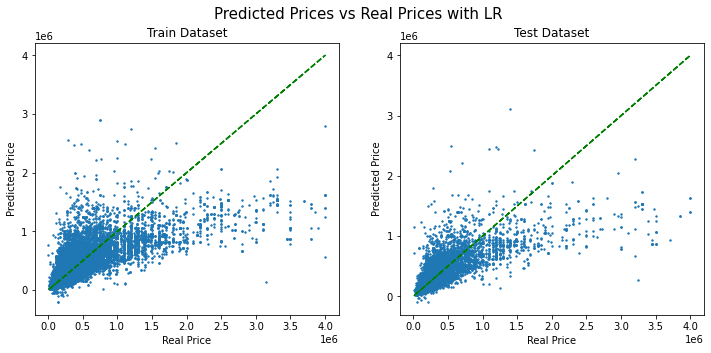

In [174]:
# Graficamos el ajuste de esta predicción sobre una linea recta identidad donde predicciones = precios reales

preds = plt.figure(1)
preds.set_figheight(5)
preds.set_figwidth(12)
preds.suptitle('Predicted Prices vs Real Prices with LR', fontsize = 15)

plt.subplot(121)
plt.scatter(y_train, pred_train, s = 2)
plt.plot(y_train, y_train, '--', c = 'g')
plt.title('Train Dataset')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.subplot(122)
plt.scatter(y_test, pred_test, s = 2)
plt.plot(y_test, y_test, '--', c = 'g')
plt.title('Test Dataset')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

> Ahora evaluamos dos modelos de regresión: k nearest neighbors con 5 vecinos, y Decision Tree sin límites de profundidad, los modelos default de sci-kit learn

In [175]:
kmodel = KNeighborsRegressor()
kmodel.fit(X_train, y_train)

tmodel = DecisionTreeRegressor(random_state = 7)
tmodel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=7)

In [176]:
# Revisamos el MAE de los modelos sobre los datos de entrenamiento y validación
kpred_train = kmodel.predict(X_train)
tpred_train = tmodel.predict(X_train)

kpred_test = kmodel.predict(X_test)
tpred_test = tmodel.predict(X_test)

kdmae_train = mean_absolute_error(y_train, kpred_train)
tmae_train = mean_absolute_error(y_train, tpred_train)

kdmae_test = mean_absolute_error(y_test, kpred_test)
tmae_test = mean_absolute_error(y_test, tpred_test)

pd.DataFrame([[kdmae_train, tmae_train], [kdmae_test, tmae_test]],
             columns = ['KNN MAE ($ USD)', 'DT MAE ($ USD)'], index = ['Train','Test'])

,KNN MAE ($ USD),DT MAE ($ USD)
Train,56969.194499,35517.577257
Test,66440.388948,55876.901390


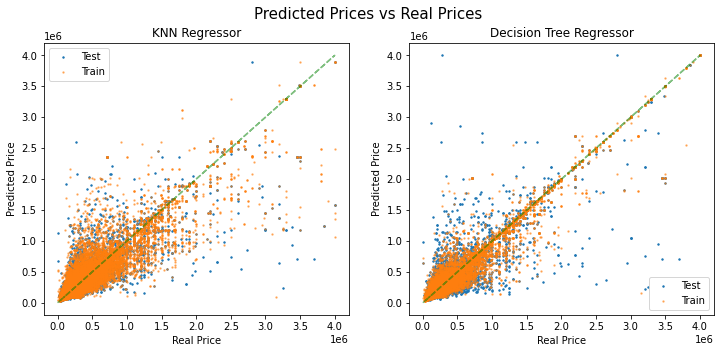

In [177]:
#Graficamos la linealidad de estas predicciones respecto al precio conocido (y_test)

preds = plt.figure(1)
preds.set_figheight(5)
preds.set_figwidth(12)
preds.suptitle('Predicted Prices vs Real Prices', fontsize = 15)

plt.subplot(121)
plt.scatter(y_test, kpred_test, s = 2, label = 'Test')
plt.scatter(y_train, kpred_train, s = 2, alpha = 0.5, label = 'Train')
plt.plot(y_train, y_train, '--', c = 'g', alpha = 0.5)
plt.title('KNN Regressor')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.legend()

plt.subplot(122)
plt.scatter(y_test, tpred_test, s = 2, label = 'Test')
plt.scatter(y_train, tpred_train, s = 2, alpha = 0.5, label = 'Train')
plt.plot(y_train, y_train, '--', c = 'g', alpha = 0.5)
plt.title('Decision Tree Regressor')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.legend()

> Ahora evaluaremos los modelos con diferentes valores en dos hiperparámetros: el numero de vecinos para el modelo KNN y la profundidad maxima del árbol de decisión

In [178]:
# Definimos las listas de valores de hiperparámetros que vamos a explorar
n_neigh = [*range(1, 50, 2)]
n_level = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]

# Definimos las listas vacias para ir guardando los valores de MAE calculados
kmae_train = []
kmae_test = []

dtmae_train = []
dtmae_test = []

# Creamos, entrenamos y evaluamos los modelos en el set de entrenamiento y de validacion
# Y calculamos MAE y lo guardamos en la lista respectiva

for n in n_neigh:
    modelk = KNeighborsRegressor(n_neighbors = n)
    modelk.fit(X_train, y_train)

    k_train_pred = modelk.predict(X_train)
    k_train_mae = mean_absolute_error(y_train, k_train_pred)
    
    k_test_pred = modelk.predict(X_test)
    k_test_mae = mean_absolute_error(y_test, k_test_pred)
    
    kmae_train.append(k_train_mae)
    kmae_test.append(k_test_mae)
    
for depth in n_level:
    modeldt = DecisionTreeRegressor(max_depth = depth, random_state = 7)
    modeldt.fit(X_train, y_train)

    dt_train_pred = modeldt.predict(X_train)
    dt_train_mae = mean_absolute_error(y_train, dt_train_pred)
    
    dt_test_pred = modeldt.predict(X_test)
    dt_test_mae = mean_absolute_error(y_test, dt_test_pred)
    
    dtmae_train.append(dt_train_mae)
    dtmae_test.append(dt_test_mae)

Text(0.5, 1.0, 'Decision Tree Regressor')

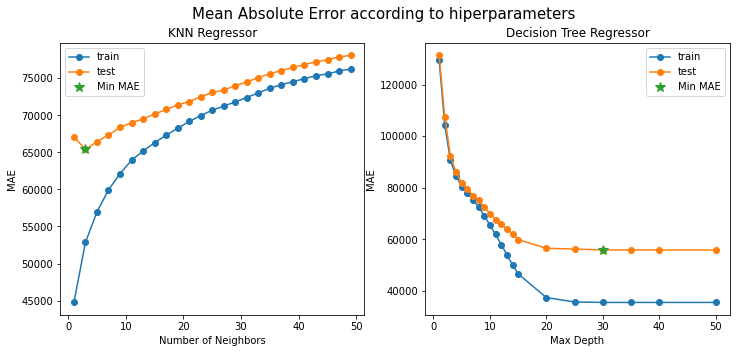

In [179]:
# Graficamos el comportamiento del MAE 

maes = plt.figure(1)
maes.set_figheight(5)
maes.set_figwidth(12)
maes.suptitle('Mean Absolute Error according to hiperparameters', fontsize = 15)

plt.subplot(121)
plt.plot(np.array(n_neigh), np.array(kmae_train), 'o-', label='train')
plt.plot(np.array(n_neigh), np.array(kmae_test), 'o-', label='test')
plt.plot(n_neigh[kmae_test.index(min(kmae_test))], min(kmae_test), '*', markersize = 10, label='Min MAE')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.title('KNN Regressor')

plt.subplot(122)
plt.plot(np.array(n_level), np.array(dtmae_train), 'o-', label='train')
plt.plot(np.array(n_level), np.array(dtmae_test), 'o-', label='test')
plt.plot(n_level[dtmae_test.index(min(dtmae_test))], min(dtmae_test), '*', markersize = 10, label='Min MAE')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('Decision Tree Regressor')

In [180]:
print('Para el modelo de KNN el menor MAE encontrado fue',
      min(kmae_test),
      'con n_neighbors = ', n_neigh[kmae_test.index(min(kmae_test))])

print('Para el modelo de DT el menor MAE encontrado fue',
      min(dtmae_test),
      'con max_depth = ', n_level[dtmae_test.index(min(dtmae_test))])

Para el modelo de KNN el menor MAE encontrado fue 65404.464713405425 con n_neighbors =  3
Para el modelo de DT el menor MAE encontrado fue 55876.901389826955 con max_depth =  30


> Podemos ver el performance de los 3 modelos que hemos utilizado

In [181]:
pd.DataFrame([[lrmae_train, kdmae_train, min(kmae_train), tmae_train, min(dtmae_train)],
              [lrmae_test, kdmae_test, min(kmae_test), tmae_test, min(dtmae_test)]],
             columns = ['LR MAE ($ USD)','KNN Default MAE ($ USD)', 'KNN Optimized MAE ($ USD)', 'DT Default MAE ($ USD)', 'DT Optimized MAE ($ USD)'],
             index = ['Train','Test'])

,LR MAE ($ USD),KNN Default MAE ($ USD),KNN Optimized MAE ($ USD),DT Default MAE ($ USD),DT Optimized MAE ($ USD)
Train,90192.906013,56969.194499,44746.772352,35517.577257,35517.577257
Test,92186.860182,66440.388948,65404.464713,55876.901390,55876.901390


In [182]:
# Utilizamos los hiperparámetros encontrados, predecimos los precios de nuestro test dataset
#KNN
modelk = KNeighborsRegressor(n_neighbors = 3)
modelk.fit(X_train, y_train)
k_pred = modelk.predict(X_test)

#DT
modeldt = DecisionTreeRegressor(max_depth = 30, random_state = 7)
modeldt.fit(X_train, y_train)
dt_pred = modeldt.predict(X_test)

Text(0, 0.5, 'Predicted Price')

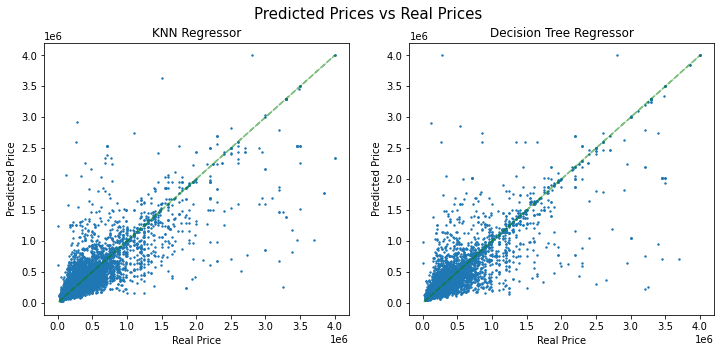

In [183]:
#Graficamos la linealidad de estas predicciones respecto al precio conocido (y_test)

preds = plt.figure(1)
preds.set_figheight(5)
preds.set_figwidth(12)
preds.suptitle('Predicted Prices vs Real Prices', fontsize = 15)

plt.subplot(121)
plt.scatter(y_test, k_pred, s = 2)
plt.plot(y_test, y_test, '--', c = 'g', alpha = 0.5)
plt.title('KNN Regressor')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.subplot(122)
plt.scatter(y_test, dt_pred, s = 2)
plt.plot(y_test, y_test, '--', c = 'g', alpha = 0.5)
plt.title('Decision Tree Regressor')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

> Podemos ver que comparados con nuestro benchmark ambos modelos tienen buen comportamiento. Sin embargo, optimizar los hiperparámetros de número de vecinos y de profundidad del árbol no significó gran mejora en el error promedio absoluto respecto a los modelos con los valores de hiperparámetros default en la librería sck-kit learn. Incluso, el mejor modelo, que es el árbol de decisión, no se benefició de la optimizacion. Debemos modificar otros aspectos de nuestro modelo para lograr mejor predicción


> Para el modelo de regresión con KNN usaremos los 3 vecinos, pero modificaremos el peso de la distancia a cada uno de los vecinos.

In [184]:
# Definimos las listas vacias para ir guardando los valores de MAE calculados
kmae_train = []
kmae_test = []

# Creamos, entrenamos y evaluamos los modelos en el set de entrenamiento y de validacion
# Y calculamos MAE y lo guardamos en la lista respectiva

for weight in (['uniform','distance']):
    modelk = KNeighborsRegressor(n_neighbors = 3, weights = weight)
    modelk.fit(X_train, y_train)

    k_train_pred = modelk.predict(X_train)
    k_train_mae = mean_absolute_error(y_train, k_train_pred)
    
    k_test_pred = modelk.predict(X_test)
    k_test_mae = mean_absolute_error(y_test, k_test_pred)
    
    kmae_train.append(k_train_mae)
    kmae_test.append(k_test_mae)

pd.DataFrame([[kmae_train[0],kmae_train[1]], [kmae_test[0], kmae_test[1]]],
             columns = ['KNN uniform', 'KNN distance'], index = ['Train','Test'])


,KNN uniform,KNN distance
Train,52849.393415,39594.234751
Test,65404.464713,59580.735831


> Aunque usando el método distance de peso a las distancias a los vecinos en el modelo KNN se reduce el MAE en un 8.9%, aún no supera al Arbol de decision previamente formulado con profundidad de 30 niveles (MAE de \\$ 55876 USD). El modelo elegido entonces es el arbol de decision con 30 niveles de profundidad.

> Sin embargo, tenemos más información que podría ser valiosa en esta predicción. El barrio de un inmueble afecta su precio tal vez mas de lo que otras características lo hacen. Casas del mismo tamaño con las mismas habitaciones cuestan valores muy diferentes en distintas partes de la ciudad, por esto tal vez haciendo un modelo por cada barrio tendriamos mejor predicción. Utilizamos un Arbol de Decision con profundidad máxima de 30 niveles.

In [185]:
# Empezamos de nuevo para tener tambien los barrios en el dataset
listings_data = pd.read_csv("Datos_Properati.csv")

# Filtramos por las condiciones dadas y las caracteristicas necesarias
C1 = listings_data.l2 == 'Capital Federal'
C2 = listings_data.property_type.isin(['Departamento','PH','Casa'])
C3 = (listings_data.surface_total <= 1000) & (listings_data.surface_total >= 15)
C4 = listings_data.price <= 4000000
C5 = listings_data.surface_covered <= listings_data.surface_total

listings_data = listings_data.loc[C1 & C2 & C3 & C4 & C5]
listings_data_features = listings_data[['l3','bathrooms', 'surface_total', 'surface_covered', 'price']]
listings_data_features.dropna(axis = 0, inplace = True)

# Miramos las dimensiones de la data
print(listings_data_features.shape)

(80276, 5)


In [186]:
# Iniciamos a evaluar el modelo en data sets de cada barrio, y obtenemos el MAE 

MAES = []

for neighborhood in listings_data_features.l3.unique():
    data = listings_data_features.loc[listings_data_features.l3 == neighborhood]
    X = data[['bathrooms', 'surface_total', 'surface_covered']]
    y = data['price']
    
    # Separamos nuestra data en la de entrenamiento y la de validación
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
    
    # Creamos el modelo, lo entrenamos, predecimos y obtenemos el MAE 
    model = DecisionTreeRegressor(max_depth = 30, random_state = 7)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, pred)
    
    MAES.append(MAE)

Text(0.5, 1.0, 'MAE for Each Neighborhood')

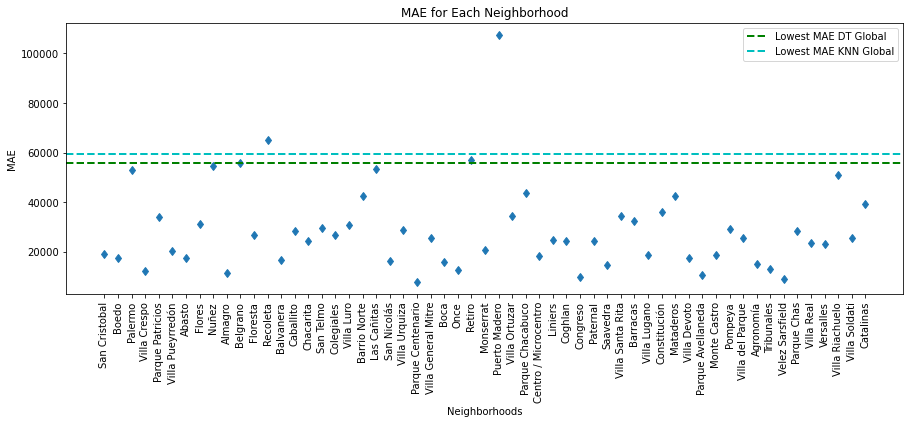

In [188]:
maes = plt.figure(1)
maes.set_figheight(5)
maes.set_figwidth(15)

plt.plot(np.array(listings_data.l3.unique()), np.array(MAES), 'd')
plt.axhline(min(dtmae_test), color = 'g', linestyle = 'dashed', linewidth = 2, label='Lowest MAE DT Global')
plt.axhline(min(kmae_test), color = 'c', linestyle = 'dashed', linewidth = 2, label='Lowest MAE KNN Global')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('Neighborhoods')
plt.ylabel('MAE')
plt.title('MAE for Each Neighborhood')

> Como podemos ver, tenemos mucho mejores resultados si separamos las publicaciones por barrio y aplicamos el modelo en cada uno de ellos. Excepto en Puerto Madero. 

> Revisemos los datos del barrio Puerto Madero y como el modelo predice en ellos. 

In [189]:
pm_listings = listings_data_features.loc[listings_data_features.l3 == 'Puerto Madero']
pm_listings.shape

(1716, 5)

In [190]:
features = ['bathrooms', 'surface_total', 'surface_covered']
X = pm_listings[features]
y = pm_listings['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

model = DecisionTreeRegressor(max_depth = 30, random_state = 7)
model.fit(X_train,y_train)
pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
print('El MAE es', MAE)

El MAE es 107415.16523113471


Text(0.5, 1.0, 'Error between Predicted and Real Prices')

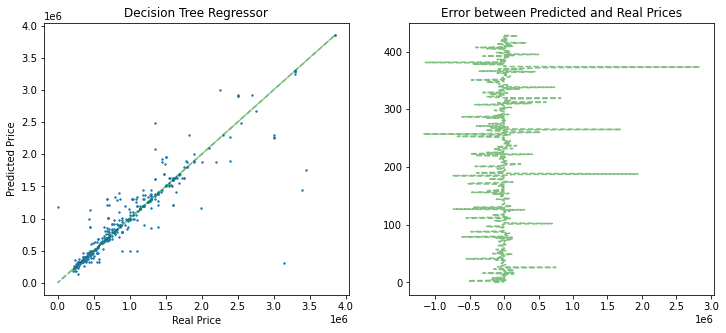

In [191]:
pm_pred = plt.figure(1)
pm_pred.set_figheight(5)
pm_pred.set_figwidth(12)

plt.subplot(121)
plt.scatter(y_test, pred, s = 2)
plt.plot(y_test, y_test, '--', c = 'g', alpha = 0.5)
plt.title('Decision Tree Regressor')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.subplot(122)
plt.plot(y_test - pred, range(0, len(y_test)), '--', c = 'g', alpha = 0.5)
plt.title('Error between Predicted and Real Prices')

> Podemos ver que realmente hay unos pocos puntos alejados de la recta, pero por ser menos datos el MAE se ve afectado grandemente por estos errores. Intentemos eliminar estos segun lo que se ve en la gráfica y calcular de nuevo

In [192]:
errors = np.array(y_test) - np.array(pred)
np.where(errors == np.amax(errors))

(array([373], dtype=int64),)

In [193]:
np.where(errors == np.amin(errors))

(array([257], dtype=int64),)

In [194]:
# El error maximo esta en la prediccion # 373 y el minimo la # 257. Miramos estos listings en los datos
X_test.reset_index(inplace = True)
X_test.loc[(X_test.index == 373) | (X_test.index == 257)]

,index,bathrooms,surface_total,surface_covered
257,96337,3.0,195.0,195.0
373,28275,1.0,54.0,54.0


In [195]:
# miramos estos listings en los datos globales
listings_data.loc[(listings_data.index == 28275) | (listings_data.index == 96337)]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
28275,2019-05-12,2019-06-08,2019-05-12,-34.609558,-58.362674,Argentina,Capital Federal,Puerto Madero,2.0,1.0,1.0,54.0,54.0,3150000.0,USD,2 AMBIENTES C/COCHERA Puerto Madero Edif Terrazas,"Edificio Terrazas del Dique, vista a la pileta...",Departamento,Venta
96337,2019-11-06,2019-12-23,2019-11-06,NaN,NaN,Argentina,Capital Federal,Puerto Madero,5.0,3.0,3.0,195.0,195.0,6000.0,USD,RENOIR 2 - 3 DORMITORIOS EN SUITE - PUERTO MAD...,"En piso alto, 3 suites con dependencia. Se alq...",Departamento,Venta


In [196]:
# En uno precio esta muy alto para la superficie, y en el siguiente el usuario no provee la ubicacion exacta y en la descripcion dice alquila no vende.
# Borramos estos datos
pm_listings.drop(index = [28275, 96337], inplace = True)

In [197]:
# Volvemos a entrenar y predecir
features = ['bathrooms', 'surface_total', 'surface_covered']
X = pm_listings[features]
y = pm_listings['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
model = DecisionTreeRegressor(max_depth = 30, random_state = 7)
model.fit(X_train,y_train)
pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
print('El MAE es',MAE)

El MAE es 86632.60833003606


> Aunque el MAE todavia es alto comparado con el de los otros barrios, vimos como solo eliminar dos listings con información poco confiable generó una reduccion del 19,3% en el MAE (equivalente a \$ 20782 USD). Seguramente a medida que nos aseguremos de la veracidad de los datos con los que entrenamos el modelo mejorará mucho mas 

## Conclusión



> El mejor modelo para la predicción del precio de venta de las propiedades en nuestra base de datos es un Arbol de Decision con profundidad máxima de 30 niveles. Para una mejor predicción se sugiere entrenar un modelo para las publicaciones de cada barrio de la ciudad capital y asegurarse de la integridad de la informacion en las publicaciones antes de predecir su precio.